In [91]:
import time
import numpy as np
import torch
from torch import nn
from torch import optim
import math
import matplotlib.pyplot as plt
from sklearn import datasets

In [92]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=3, noise=20, random_state=None)

In [93]:
x = torch.tensor(x_numpy, dtype=torch.float32)
y = torch.tensor(y_numpy, dtype=torch.float32)

In [94]:
y = y.view(y.shape[0],1)

In [95]:
n_samples, n_features = x.shape
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [96]:
model

Linear(in_features=3, out_features=1, bias=True)

In [97]:
loss = nn.MSELoss()
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

epoch 1: w = 0.103, loss = 6701.08398438


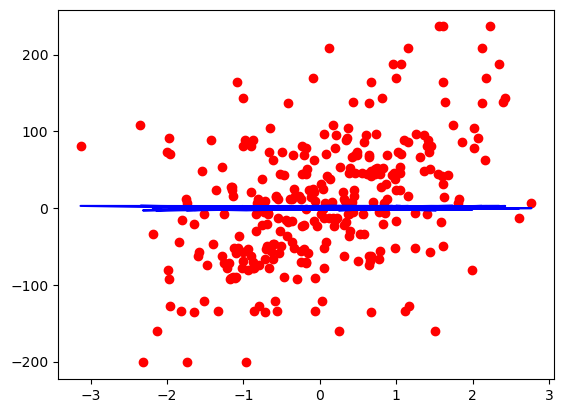

epoch 101: w = 27.778, loss = 515.53039551


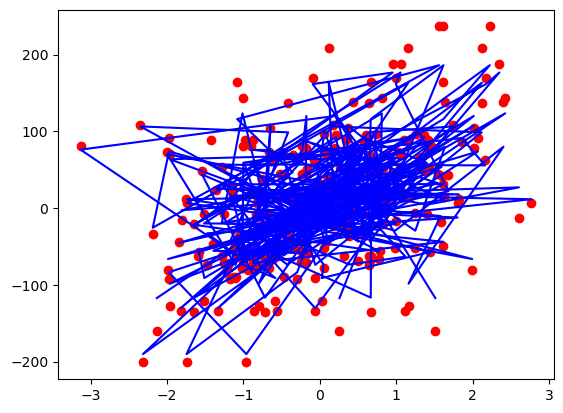

epoch 201: w = 31.818, loss = 428.01797485


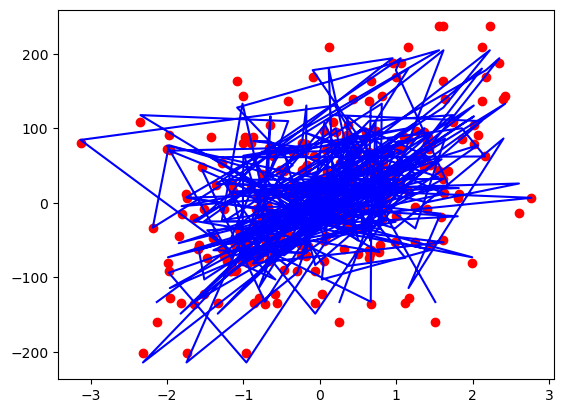

epoch 301: w = 32.406, loss = 426.25170898


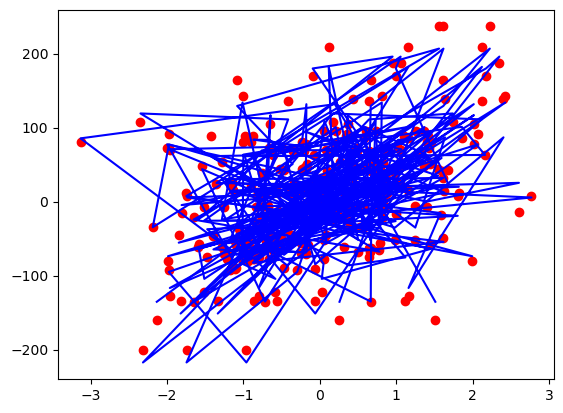

epoch 401: w = 32.493, loss = 426.20858765


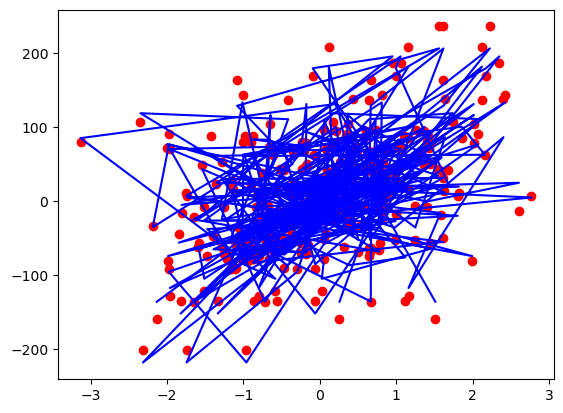

epoch 501: w = 32.506, loss = 426.20745850


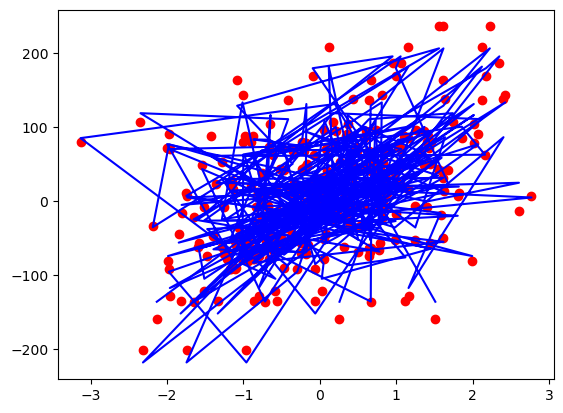

epoch 601: w = 32.508, loss = 426.20745850


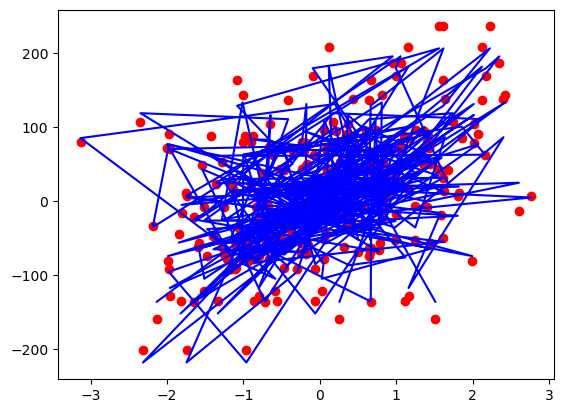

epoch 701: w = 32.508, loss = 426.20739746


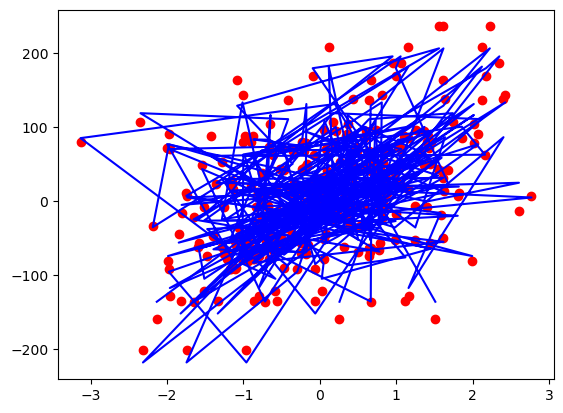

epoch 801: w = 32.508, loss = 426.20742798


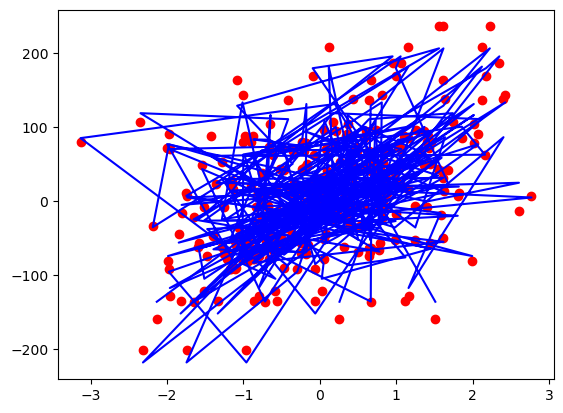

epoch 901: w = 32.508, loss = 426.20739746


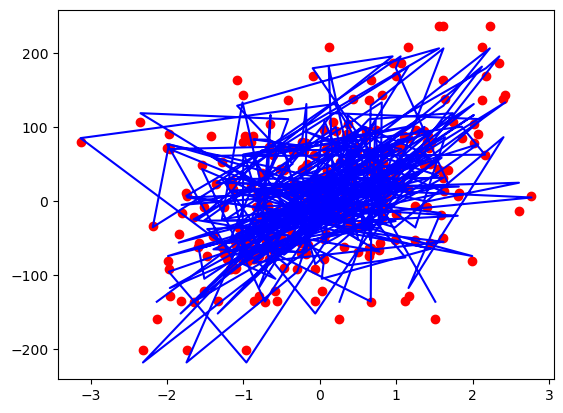

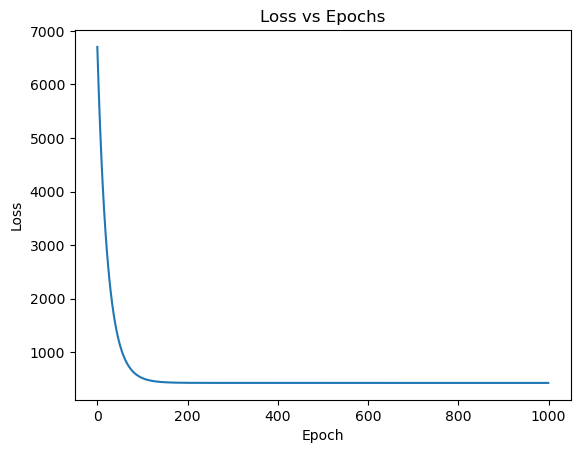

In [98]:
epochs = 1000
lost = []
for e in range(epochs):
    y_predicted = model(x)
    l = loss(y_predicted, y)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    lost.append(l.item())

    if e%100 == 0:
        [w,b] = model.parameters()
        print(f'epoch {e+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        predicted = model(x).detach().numpy()
        plt.plot(x_numpy, y_numpy, 'ro')
        plt.plot(x_numpy, predicted, 'b')
        plt.show()
plt.plot(range(1000), lost)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [99]:
""""Show sample y based on input x"""
sample_x = torch.tensor([[1.0, 2.0], [5.0, 6.0]])
sample_y = model(sample_x)
sample_y

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x2 and 3x1)